# Machine learning for data analysis


# Week 1: Decision Tree

In [4]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

In [5]:
#load dataset
file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')
#rename columns
df=file[['S2AQ21A','S1Q6A','S3AQ3C1','S3BQ1A6']]
df=df.rename(columns={'S2AQ21A':'drinks','S1Q6A':'school','S3AQ3C1':'cigarettes','S3BQ1A6':'drugs'})
#clean data
df=df.dropna()
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)|(df["drugs"] == 9)],axis=0,inplace=True)

In [6]:
df.describe()


,drinks,school,cigarettes,drugs
count,16325.000000,16325.000000,16325.000000,16325.000000
mean,4.595345,9.374456,15.691516,1.885942
std,2.843686,2.287153,12.469562,0.317892
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,8.000000,6.000000,2.000000
50%,4.000000,10.000000,15.000000,2.000000
75%,6.000000,11.000000,20.000000,2.000000
max,10.000000,14.000000,98.000000,2.000000


In [7]:
#modelling and prediction
# RESPONSE     S3BQ1A6 EVER USED COCAINE OR CRACK
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
#S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES


predictors=df[['drinks','school','cigarettes']]
target=df.drugs

In [8]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,target,test_size=0.4)
print(pred_train.shape,pred_test.shape,tar_train.shape,tar_test.shape)


(9795, 3) (6530, 3) (9795,) (6530,)


In [9]:
#Build model on training dataset
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

In [10]:
predictions=classifier.predict(pred_test)

In [11]:
sklearn.metrics.confusion_matrix(tar_test,predictions)


array([[  24,  747],
       [ 166, 5593]])

In [12]:
print('% of right prediction')
sklearn.metrics.accuracy_score(tar_test,predictions)

% of right prediction


0.8601837672281777

In [3]:
print('the model predict the result with 0.873% of precision thus we can say that the model works well and can classify potential people with drugs problems appropriately.')

the model predict the result with 0.873% of precision thus we can say that the model works well and can classify potential people with drugs problems appropriately.


In [13]:
## Display decision Tree
#from sklearn import tree
#from io import StringIO
#from IPython.display import Image
#out=StringIO()
#tree.export_graphviz(classifier,out_file=out)
#import pydotplus
#graph=pydotplus.graph_from_dot_data(out.getvalue())
#Image(graph.create_png())

## Week 2: Random Forest

In [2]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import os 
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
#feature importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [10]:
#load dataset
# RESPONSE     S3BQ1A6 EVER USED COCAINE OR CRACK
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
#S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#S10Q1B60 EVER TROUBLE YOU OR CAUSE PROBLEMS AT WORK/SCHOOL OR WITH FAMILY/OTHER PEOPLE


file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')



In [11]:
#rename columns
df=file[['S2AQ21A','S1Q6A','S3AQ3C1','S3BQ1A6','S10Q1B60']]
df=df.rename(columns={'S2AQ21A':'drinks','S1Q6A':'school','S3AQ3C1':'cigarettes','S3BQ1A6':'drugs','S10Q1B60':'trouble'})

In [12]:
#clean data
df=df.dropna()
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)|(df["trouble"] == 9)|(df["drugs"] == 9)],axis=0,inplace=True)

In [13]:
#replace 2 with 0
df["drugs"].replace({2: 0}, inplace=True)
df["trouble"].replace({2: 0}, inplace=True)


In [14]:
#predictors and target
predictors=df[['drinks','school','cigarettes','trouble']]
targets=df.drugs

In [15]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,targets,test_size=0.4)

In [16]:
#build a model on training dataset
from sklearn.ensemble import RandomForestClassifier
# n_estimators= number of trees
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

In [17]:
predictions=classifier.predict(pred_test)

In [21]:
print('confusion matrix')
sklearn.metrics.confusion_matrix(tar_test,predictions)

confusion matrix


array([[5512,   69],
       [ 762,   15]])

In [20]:
print('accurancy score')
sklearn.metrics.accuracy_score(tar_test,predictions)

accurancy score


0.8692985215476565

In [23]:
#fit an Extra Trees model to the data
model=ExtraTreesClassifier()
model.fit(pred_train,tar_train)
print('relative importance of drinks,school,cigarettes,trouble as classifier')
print(model.feature_importances_)

relative importance of drinks,school,cigarettes,trouble as classifier
[0.2886429  0.22501858 0.44111264 0.04522589]


running a different number of trees and see the effect of that on the accurancy of the prediction


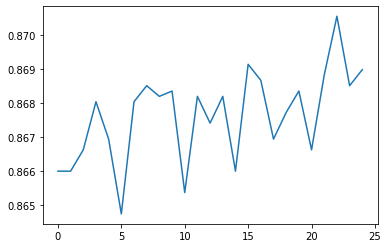

In [28]:
print('running a different number of trees and see the effect of that on the accurancy of the prediction')
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test,predictions)
    
plt.cla()
plt.plot(trees,accuracy);

In [29]:
print('the accuracy is 0.8692985215476565 and the importance of each parameter is [0.2886429  0.22501858 0.44111264 0.04522589]. In the image is confronted the accuracy and the number of trees used')

the accuracy is 0.8692985215476565 and the importance of each parameter is [0.2886429  0.22501858 0.44111264 0.04522589]. In the image is confronted the accuracy and the number of trees used


## Week 3: Lasso Regression

In [31]:
from sklearn.linear_model import LassoLarsCV

In [33]:
#load dataset
#  RESPONSE #S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#S3BQ1A6 EVER USED COCAINE OR CRACK
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
#S10Q1B60 EVER TROUBLE YOU OR CAUSE PROBLEMS AT WORK/SCHOOL OR WITH FAMILY/OTHER PEOPLE


file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')


In [34]:
#rename columns
df=file[['S2AQ21A','S1Q6A','S3AQ3C1','S3BQ1A6','S10Q1B60']]
df=df.rename(columns={'S2AQ21A':'drinks','S1Q6A':'school','S3AQ3C1':'cigarettes','S3BQ1A6':'drugs','S10Q1B60':'trouble'})

In [35]:
#clean data
df=df.dropna()
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)|(df["trouble"] == 9)|(df["drugs"] == 9)],axis=0,inplace=True)

In [36]:
#replace 2 with 0
df["drugs"].replace({2: 0}, inplace=True)
df["trouble"].replace({2: 0}, inplace=True)


In [38]:
#predictors and target
predvar=df[['drinks','school','drugs','trouble']]
targets=df.cigarettes

In [41]:
# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
from sklearn import preprocessing
predictors['drinks']=preprocessing.scale(predictors['drinks'].astype('float64'))
predictors['trouble']=preprocessing.scale(predictors['trouble'].astype('float64'))
predictors['drugs']=preprocessing.scale(predictors['drugs'].astype('float64'))
predictors['school']=preprocessing.scale(predictors['school'].astype('float64'))

In [42]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,targets,test_size=0.3,random_state=123)

In [43]:
#specify the lassio regression model
#cv=10 means that we have 10 folders for crossvalidation
model=LassoLarsCV(cv=10,precompute=False).fit(pred_train,tar_train)

In [45]:
#print variable names and regression coefficients
dict(zip(predictors.columns,model.coef_))

{'drinks': -1.9261595720963074,
 'school': -0.8797530745558744,
 'drugs': -0.3084884014533245,
 'trouble': 0.3378663310945107}

In [46]:
print('the model takes all the variables to predict the result: the number of cigarettes is negative associated with drinks,school level, drugs but positive associated with troubles.The strongest variable is drinks with a coef=-1.92616')

the model takes all the variables to predict the result: the number of cigarettes is negative associated with drinks,school level, drugs but positive associated with troubles.The strongest variable is drinks with a coef=-1.92616


In [49]:
print('jdaskdanj \ kdnand')

jdaskdanj \ kdnand


## Week 4:k-means cluster analysis

In [88]:
from sklearn.cluster import KMeans


In [89]:
#load dataset

#  RESPONSE #S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#S3BQ4 NUMBER OF CANNABIS JOINTS USUALLY SMOKED IN A DAY WHEN USING CANNABIS THE MOST
#S3BQ1A6 EVER USED COCAINE OR CRACK
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
#S10Q1B60 EVER TROUBLE YOU OR CAUSE PROBLEMS AT WORK/SCHOOL OR WITH FAMILY/OTHER PEOPLE


file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')


In [90]:
#rename columns
df=file[['S2AQ21A','S3AQ3C1','S3BQ1A6','S10Q1B60','S3BQ4']]
df=df.rename(columns={'S2AQ21A':'drinks','S3AQ3C1':'cigarettes','S3BQ1A6':'drugs','S10Q1B60':'trouble','S3BQ4':'joints'})


In [91]:
#clean data
df=df.dropna()
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)|(df["joints"] == 99)|(df["trouble"] == 9)|(df["drugs"] == 9)],axis=0,inplace=True)

In [92]:
#replace 2 with 0
df["drugs"].replace({2: 0}, inplace=True)
df["trouble"].replace({2: 0}, inplace=True)


In [93]:
#subset clustering variables
cluster=df[['drinks','drugs','trouble','joints']]
cluster.describe()

,drinks,drugs,trouble,joints
count,4994.000000,4994.000000,4994.000000,4994.000000
mean,3.638767,0.334401,0.015419,2.362835
std,2.360056,0.471828,0.123223,3.661157
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,1.000000
75%,5.000000,1.000000,0.000000,2.000000
max,10.000000,1.000000,1.000000,98.000000


In [94]:
# standardize predictors to have mean=0 and sd=1
clustervar=cluster.copy()
from sklearn import preprocessing
clustervar['drinks']=preprocessing.scale(clustervar['drinks'].astype('float64'))
clustervar['trouble']=preprocessing.scale(clustervar['trouble'].astype('float64'))
clustervar['drugs']=preprocessing.scale(clustervar['drugs'].astype('float64'))
clustervar['joints']=preprocessing.scale(clustervar['joints'].astype('float64'))

In [95]:
#split 
clus_train,clus_test=train_test_split(clustervar,test_size=0.3,random_state=123)
#k-means cluster analysis for 1-9 clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train,model.cluster_centers_,'euclidean'),axis=1))/clus_train.shape[0])


average distance from observations from cluster centroid 


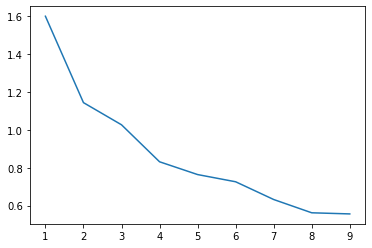

In [96]:
print('average distance from observations from cluster centroid ')
plt.plot(clusters,meandist);

In [97]:
#interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

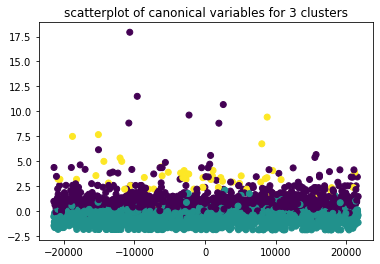

In [109]:
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=model3.labels_,)
plt.title('scatterplot of canonical variables for 3 clusters')
plt.show()

In [98]:

"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

In [99]:
# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()


1    2275
0    1165
2      55
Name: cluster, dtype: int64

In [100]:
"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)


Clustering variable means by cluster
                index    drinks     drugs   trouble    joints
cluster                                                      
0        22052.266094 -0.261227  1.388989 -0.125140  0.365149
1        21113.501099  0.150096 -0.708807 -0.125140 -0.196493
2        20754.763636 -0.378551  0.640048  7.991066  0.839580


In [101]:
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
gpa_data=df['cigarettes']
# split GPA data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['cigarettes', 'cluster']].dropna()


In [103]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='cigarettes ~ (cluster)', data=df).fit()
print (gpamod.summary())

                            OLS Regression Results                            
Dep. Variable:             cigarettes   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     30.65
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           3.03e-25
Time:                        17:59:10   Log-Likelihood:                -19286.
No. Observations:                4994   AIC:                         3.858e+04
Df Residuals:                    4989   BIC:                         3.861e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2907      0.360     48.010      0.0

In [104]:
print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)


means for GPA by cluster
         cigarettes
cluster            
0         15.877253
1         14.977582
2         17.818182


In [105]:
print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

standard deviations for GPA by cluster
         cigarettes
cluster            
0         11.385296
1         11.666501
2         12.180876


In [107]:
mc1 = multi.MultiComparison(sub1['cigarettes'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.8997 0.0791  -1.878 0.0787  False
     0      2   1.9409 0.4465 -1.8062 5.6881  False
     1      2   2.8406 0.1708 -0.8651 6.5463  False
---------------------------------------------------


In [ ]:
A k-means cluster analysis was conducted to identify underlying subgroups of people based on their similarity of
responses on 4 variables that represent characteristics that could have an impact smoking cigarettes. 
Clustering variables included two binary variables measuring whether or not the adolescent had ever used drugs
or had made some troubles, as well as quantitative variables measuring alcohol problems and joints of marijuana smoked.
All clustering variables were standardized to have a mean of 0 and a standard deviation of 1. 

Data were randomly split into a training set that included 70% of the observations (N=3496) and a test set that
included 30% of the observations (N=1498). A series of k-means cluster analyses were conducted on the training 
data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted
for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide 
guidance for choosing the number of clusters to interpret.  

The elbow curve was inconclusive, suggesting that the 2, 4 and 8-cluster solutions might be interpreted.
The results below are for an interpretation of the 3-cluster solution.  
Canonical discriminant analyses was used to reduce the 4 clustering variable down a few variables that accounted 
for most of the variance in the clustering variables.  Clusters were generally distinct.

The means on the clustering variables showed that, compared to the other clusters, people in cluster 3 had
big levels on the clustering variables. They had a relatively big likelihood of using drugs or marijuana and
to make troubles but they do not use to drink . On the other hand, cluster 1 clearly 
included the most quiet people. 
